<a href="https://colab.research.google.com/github/ahmedshaik982/Play_Store_App_Review_Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**



*   **The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.**
*   **Here we have two data sets. One is play store data which contains each app (row) . And the other dataset is user reviews.**


*   **Our main objective is to explore and analyze these datasets to discover key factors responsible for app engagement and success**






In [323]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
pd.options.display.float_format = '{:.5f}'.format

import warnings
warnings.filterwarnings('ignore')

In [324]:
# Mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [325]:
# reading datasets
app = pd.read_csv('/content/drive/My Drive/files/Play Store Data.csv')
review = pd.read_csv('/content/drive/My Drive/files/User Reviews.csv')

# **Data Inspection**

**App dataset analysis**

In [326]:
# Inspecting the head of the app dataset
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [327]:
print(f'The App dataset has {app.shape[0]} rows and {app.shape[1]} columns')

The App dataset has 10841 rows and 13 columns


In [328]:
app.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**Understanding the features of App data**:


*   **App** : Name of the App

*   **Category** : Category of the app

*   **Rating** : Rating given for the app

*   **Reviews** : Total number of reviews for the app

*   **Size** : Size of the app (MB)

*   **Installs** : How many installs done for the app

*   **Type** : Type of the app
*   **Price** : Price of the app


*   **Content Rating** : Content rating

*   **Genres** : Genre of the app


*   **Last Updated** : Date of latest update


*   **Current Ver** : Current version of the app


*   **Android Ver** : Android version of the app






In [329]:
# Columns of the app data
col_app = app.columns
col_app

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [330]:
# Checking info of app data
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## **Data Cleaning and Manipulation**

In [331]:
# Checking for duplicated values
app.duplicated().value_counts()

False    10358
True       483
dtype: int64

Hence in our data there are 483 duplicated rows

In [332]:
# Checking for Null values for app data
app.isnull().sum().sort_values(ascending = False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

Here, we can see that there are 5 features with null values

In [333]:
# Removing duplicated rows
app.drop_duplicates(inplace = True)

In [334]:
# Filling the null values of rating feature with median
app['Rating'].fillna(app['Rating'].median(), inplace = True)

In [335]:
# Dropping null values of other features
new_data_app = app.dropna()
new_data_app.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [336]:
# Inspecting Installs Column
new_data_app['Installs'].dtype

dtype('O')

Installs column is Object data type. So we need to convert them integers so that we can do mathematical operations on them.

In [337]:
#Unique installs
new_data_app['Installs'].value_counts()

1,000,000+        1487
10,000,000+       1132
100,000+          1129
10,000+           1031
1,000+             888
100+               709
5,000,000+         683
500,000+           516
50,000+            473
5,000+             468
10+                384
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
Name: Installs, dtype: int64

In [338]:
# Inspecting Reviews column
new_data_app['Reviews'].dtype

dtype('O')

Reviews column is Object data type. So we need to convert them integers so that we can do mathematical operations on them.

In [339]:
# Creating a function which removes '+' and ',' and converts into integer
def to_int(x):
  return int(x[0:-1].replace(',', ''))

#Creating a function which converts string to integer of Reviews column
def int_rev(x):
  return int(x)

# Creating a function for extracting year from last updated date
def year(x):
  return x[-4:]

In [340]:
# Apply functions to the Installs column and Review Column
new_data_app['Installs'] = new_data_app['Installs'].apply(to_int)
new_data_app['Reviews'] = new_data_app['Reviews'].apply(int_rev)
new_data_app['updated_year'] = new_data_app['Last Updated'].apply(year)

In [341]:
# Inspecting Data after converting Reviews and Installs features to integer data types
new_data_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10000,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.90000,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70000,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50000,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30000,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018


# **Exploratory Data Analysis**

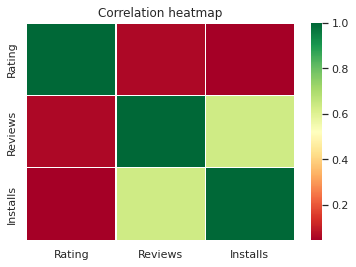

In [342]:
# Visualize the correlation heatmap of numerical features
sns.heatmap(new_data_app.corr(),  fmt="",cmap='RdYlGn',linewidths=0.30)
plt.title('Correlation heatmap')
plt.show()

From the above correlation heatmap, we can observe there is no multicollinearity exists in the data.

In [343]:
# Year Analysis
#Creating dataframe of years and thier app counts
year = new_data_app['updated_year'].value_counts().reset_index()
year = year.rename(columns = {'index':'updated_year', 'updated_year':'count'})
year

,updated_year,count
0,2018,6929
1,2017,1823
2,2016,787
3,2015,454
4,2014,204
5,2013,107
6,2012,26
7,2011,15
8,2010,1


Text(0.5, 1.0, 'Count of apps')

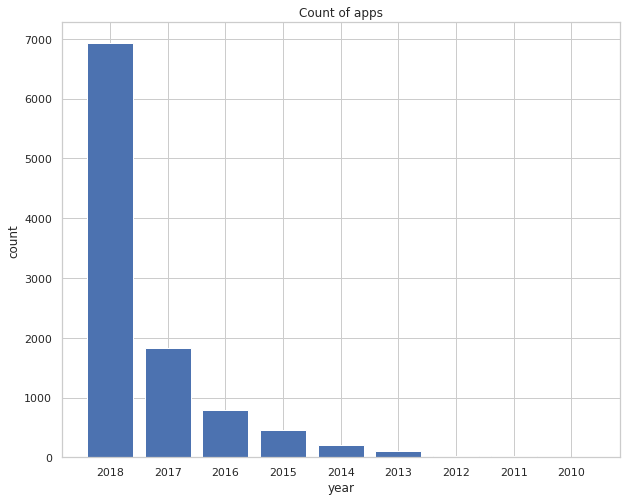

In [344]:
# Plotting above dataframe
plt.figure(figsize = (10,8))
plt.bar(year['updated_year'], year['count'])
plt.xlabel('year')
plt.ylabel('count')
plt.title('Count of apps')

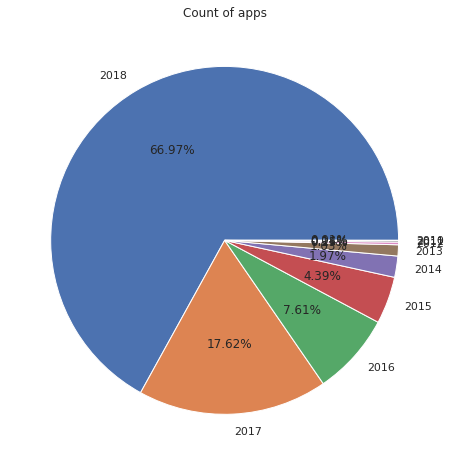

In [345]:
# Plotting pie chart for the above dataframe
plt.figure(figsize = (8,8))
plt.pie(year['count'], labels = year['updated_year'],  autopct='%1.2f%%')
plt.title('Count of apps')
plt.show()

From the above dataframe and visualizations, we can observe that most of the apps(66.97%) are updated in 2018.

In [346]:
# Years with ratings
year_rat = new_data_app.groupby('updated_year')['Rating'].mean().reset_index()
year_rat = year_rat.sort_values(by = 'Rating', ascending = False)
year_rat

,updated_year,Rating
8,2018,4.24901
0,2010,4.20000
7,2017,4.13533
3,2013,4.10374
5,2015,4.10132
6,2016,4.08869
4,2014,4.06127
1,2011,3.96667
2,2012,3.88462


Text(0.5, 1.0, 'Average Rating for Years')

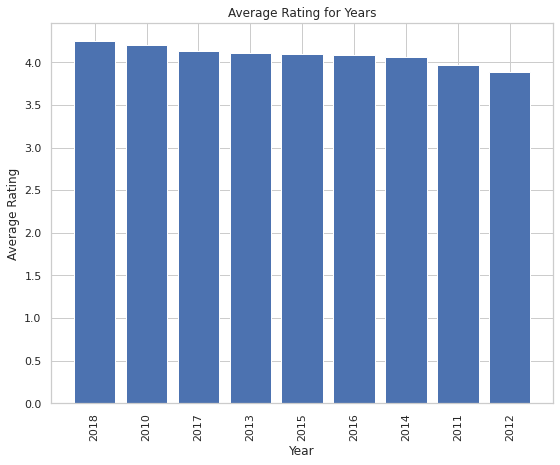

In [347]:
# Plotting above dataframe
plt.figure(figsize = (9,7))
plt.bar(year_rat['updated_year'], year_rat['Rating'])
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating for Years')

From the above dataframe and visualization, we can observe that 2018 updated apps have higher rating followed by 2010 and least is 2012.

In [348]:
# Years with Installs
year_inst = new_data_app.groupby('updated_year')['Installs'].mean().reset_index()
year_inst = year_inst.sort_values(by = 'Installs', ascending = False)
year_inst

,updated_year,Installs
8,2018,20286521.80964
7,2017,2116127.66813
6,2016,1761709.88945
4,2014,1322721.69608
1,2011,1160473.33333
3,2013,954078.17757
5,2015,919472.41189
2,2012,538161.92308
0,2010,100000.00000


Text(0.5, 1.0, 'Average Installs for Years')

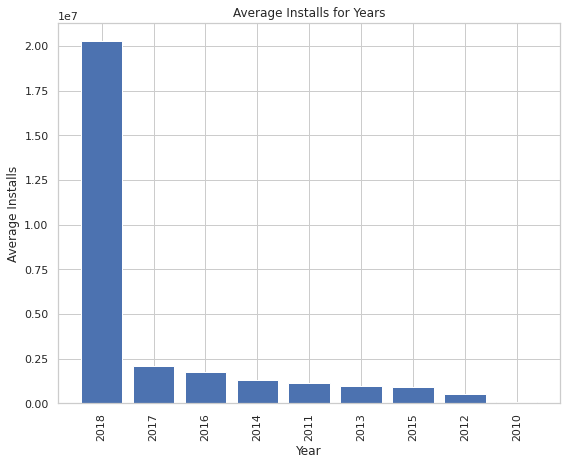

In [349]:
# Plotting above dataframe
plt.figure(figsize = (9,7))
plt.bar(year_inst['updated_year'], year_inst['Installs'])
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Installs')
plt.title('Average Installs for Years')

From the above dataframe and visualization, we can observe that 2018 updated apps have higher Installs followed by 2017 and least is 2010.

In [350]:
# Years with reviews
year_rev = new_data_app.groupby('updated_year')['Reviews'].sum().reset_index()
year_rev = year_rev.sort_values(by = 'Reviews', ascending = False)
year_rev

,updated_year,Reviews
8,2018,4051594638
7,2017,103845987
6,2016,24611646
5,2015,13244711
4,2014,6571229
3,2013,3553403
2,2012,270362
1,2011,235800
0,2010,1415


Text(0.5, 1.0, 'Average Reviews for Years')

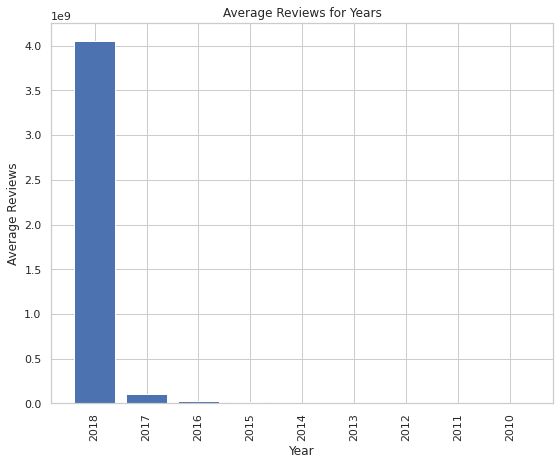

In [351]:
# Plotting above dataframe
plt.figure(figsize = (9,7))
plt.bar(year_rev['updated_year'], year_rev['Reviews'])
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Average Reviews')
plt.title('Average Reviews for Years')

From the above dataframe and visualization, we can observe that 2018 updated apps have higher Reviews followed by 2017 and least is 2010.

In [352]:
# Category Analysis
# Creating the dataframe of how many categories are present in the data
category = new_data_app['Category'].value_counts().reset_index()
category = category.rename(columns = {'index':'category', 'Category':'count'})
category

,category,count
0,FAMILY,1939
1,GAME,1121
2,TOOLS,841
3,BUSINESS,427
4,MEDICAL,408
5,PRODUCTIVITY,407
6,PERSONALIZATION,386
7,LIFESTYLE,373
8,COMMUNICATION,366
9,FINANCE,360


From the above Dataframe, we can say that there are total of 33 categories.

Text(0.5, 1.0, 'Count of categories')

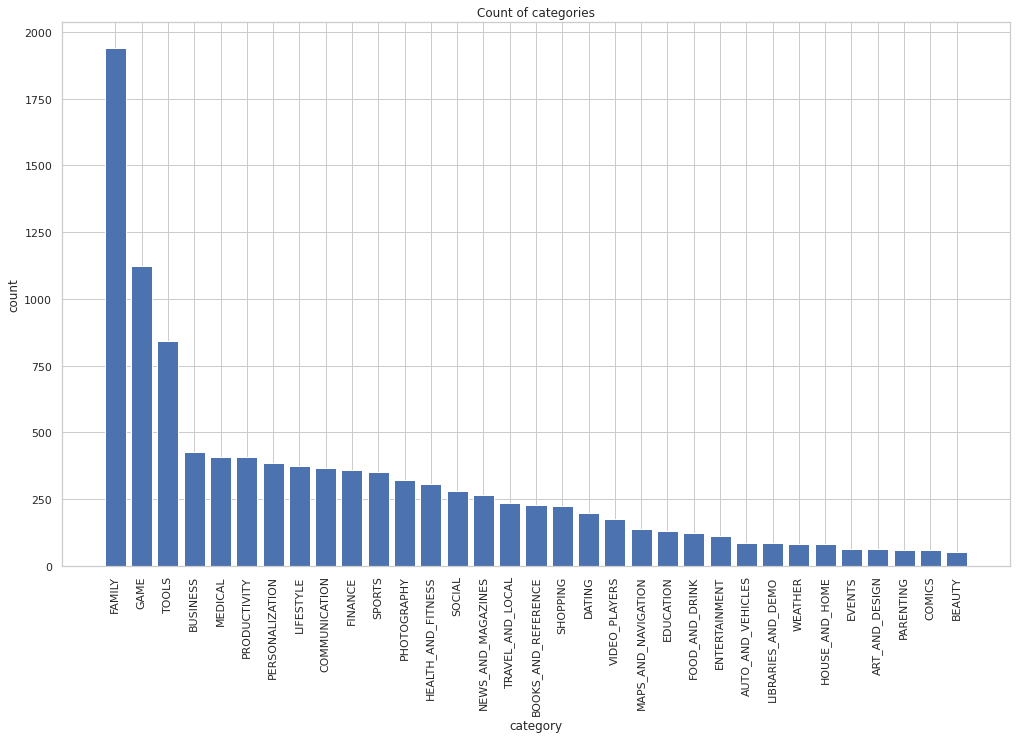

In [353]:
# Plotting above dataframe
plt.figure(figsize = (17,10))
plt.bar(category['category'], category['count'])
plt.xticks(range(len(category['category'])), category['category'], rotation='vertical')
plt.xlabel('category')
plt.ylabel('count')
plt.title('Count of categories')

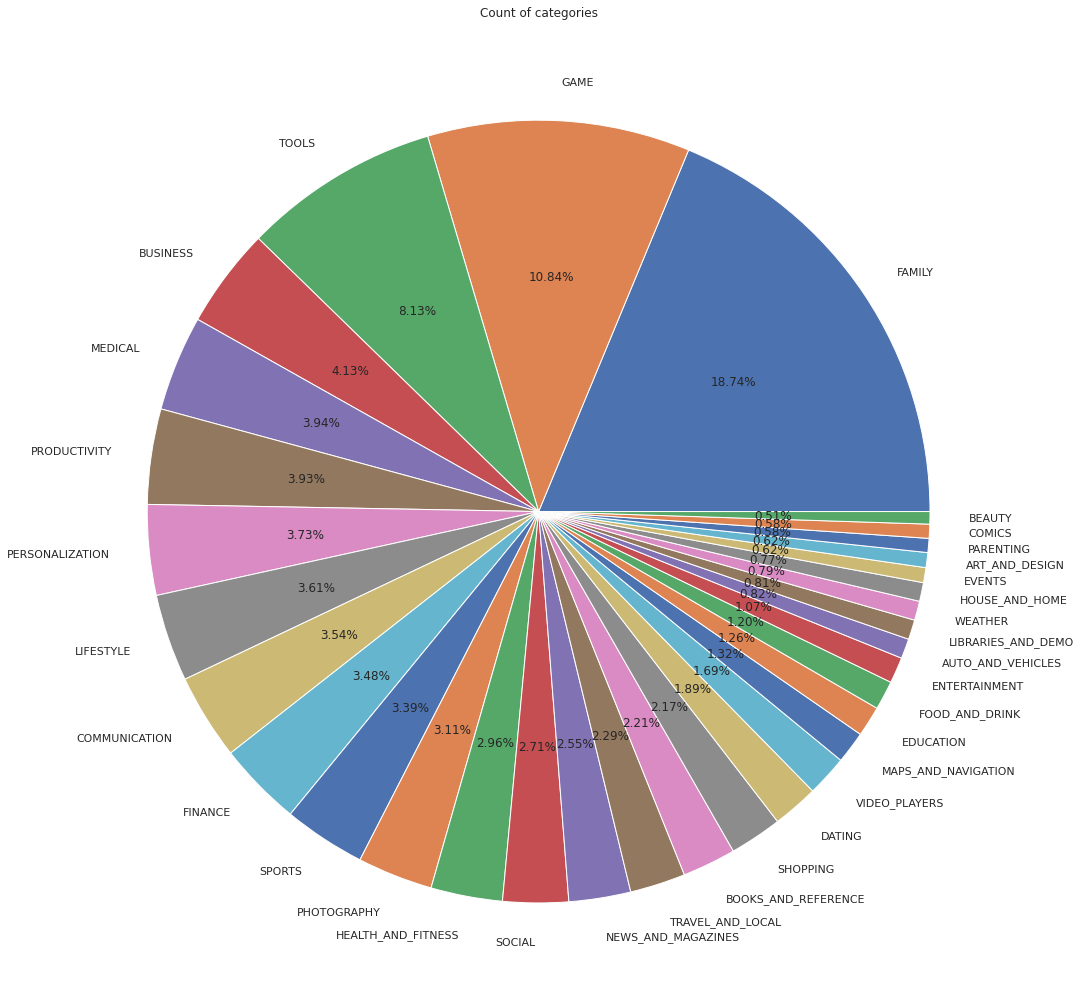

In [354]:
# Plotting pie chart for the above dataframe
plt.figure(figsize = (18,18))
plt.pie(category['count'], labels = category['category'],  autopct='%1.2f%%')
plt.title('Count of categories')
plt.show()

From the above visualizations we can observe that most apps are from Family category followed by Game category and the least is Beauty

In [355]:
# Describing the Rating column
new_data_app['Rating'].describe()

count   10346.00000
mean        4.20377
std         0.48573
min         1.00000
25%         4.10000
50%         4.30000
75%         4.50000
max         5.00000
Name: Rating, dtype: float64

Here, we can observe that least rating is 1, and the highest rating is 5

In [356]:
# Categories with ratings
cat_rat = new_data_app.groupby('Category')['Rating'].mean().reset_index()
cat_rat = cat_rat.sort_values(by = 'Rating', ascending = False)
cat_rat


,Category,Rating
10,EVENTS,4.39531
8,EDUCATION,4.37538
0,ART_AND_DESIGN,4.37344
3,BOOKS_AND_REFERENCE,4.33668
23,PERSONALIZATION,4.32642
22,PARENTING,4.30000
2,BEAUTY,4.28302
14,GAME,4.28207
15,HEALTH_AND_FITNESS,4.26699
27,SOCIAL,4.26071


In [357]:
# Printing top 5 Categories
print(f'The top 5 Categories with high ratings are {cat_rat.iloc[0:5,0].values}')

The top 5 Categories with high ratings are ['EVENTS' 'EDUCATION' 'ART_AND_DESIGN' 'BOOKS_AND_REFERENCE'
 'PERSONALIZATION']


Text(0.5, 1.0, 'Average Rating of categories')

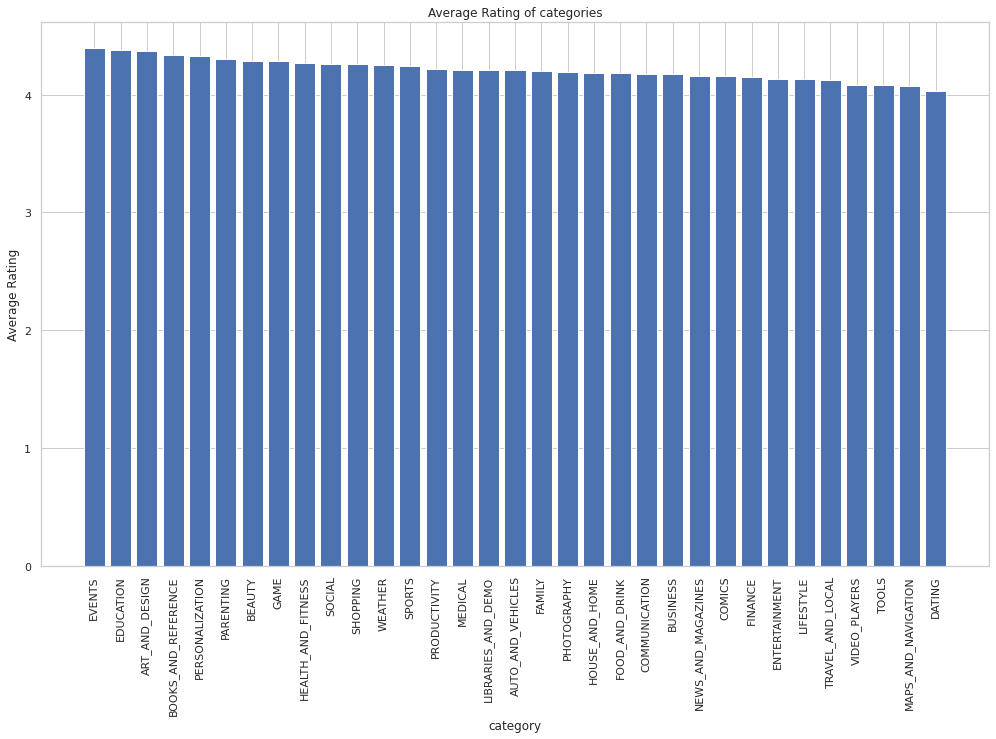

In [358]:
# Plotting above dataframe
plt.figure(figsize = (17,10))
plt.bar(cat_rat['Category'], cat_rat['Rating'])
plt.xticks(rotation='vertical')
plt.xlabel('category')
plt.ylabel('Average Rating')
plt.title('Average Rating of categories')

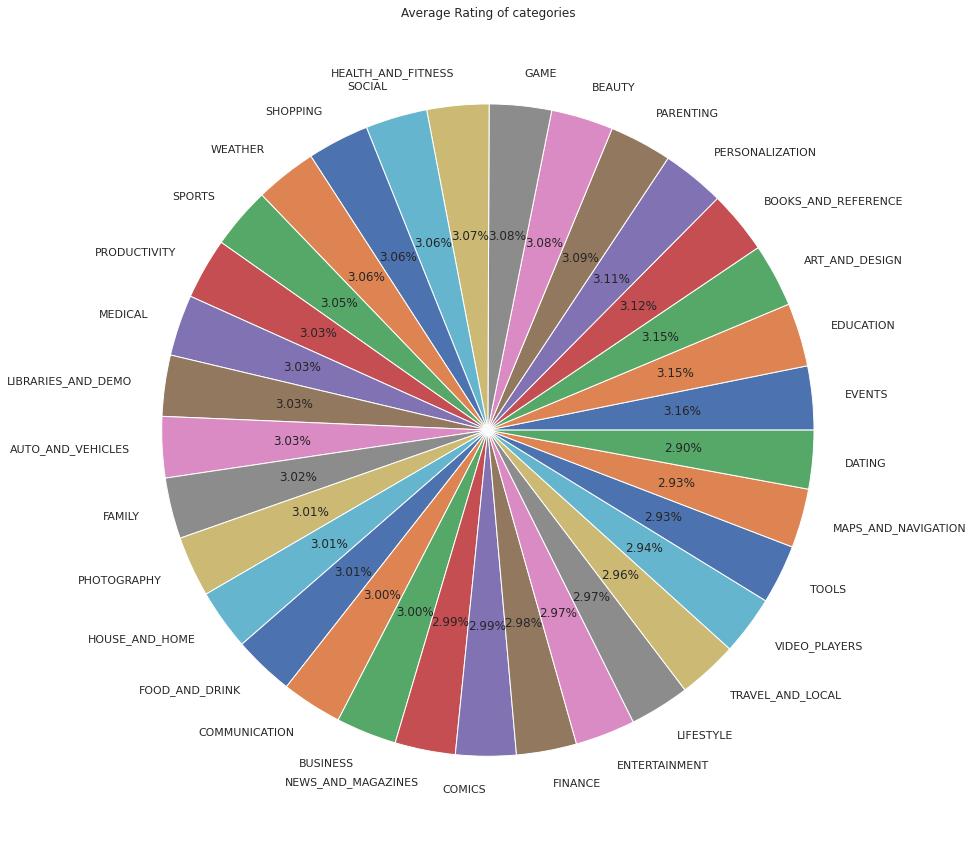

In [359]:
# Plotting pie chart for the above dataframe
plt.figure(figsize = (15,15))
plt.pie(cat_rat['Rating'], labels = cat_rat['Category'],  autopct='%1.2f%%')
plt.title('Average Rating of categories')
plt.show()

From the above visualizations, we can observe that EVENTS, EDUCATION, ART_AND_DESIGN, BOOKS_AND_REFERENCE, PERSONALIZATION are the categories with highest average ratings

In [360]:
# Categories with ratings
cat_inst = new_data_app.groupby('Category')['Installs'].mean().reset_index()
cat_inst = cat_inst.sort_values(by = 'Installs', ascending = False)
cat_inst

,Category,Installs
6,COMMUNICATION,65989825.82240
27,SOCIAL,44692385.36429
31,VIDEO_PLAYERS,35554301.25714
25,PRODUCTIVITY,30621846.11548
24,PHOTOGRAPHY,30190210.10870
14,GAME,28139183.24264
30,TRAVEL_AND_LOCAL,26843405.67932
9,ENTERTAINMENT,22123063.06306
21,NEWS_AND_MAGAZINES,20428855.15152
29,TOOLS,13617445.78478


In [361]:
# Printing top 5 Categories
print(f'The top 5 Categories with high installs are {cat_inst.iloc[0:5,0].values}')

The top 5 Categories with high installs are ['COMMUNICATION' 'SOCIAL' 'VIDEO_PLAYERS' 'PRODUCTIVITY' 'PHOTOGRAPHY']


Text(0.5, 1.0, 'Average Installs of categories')

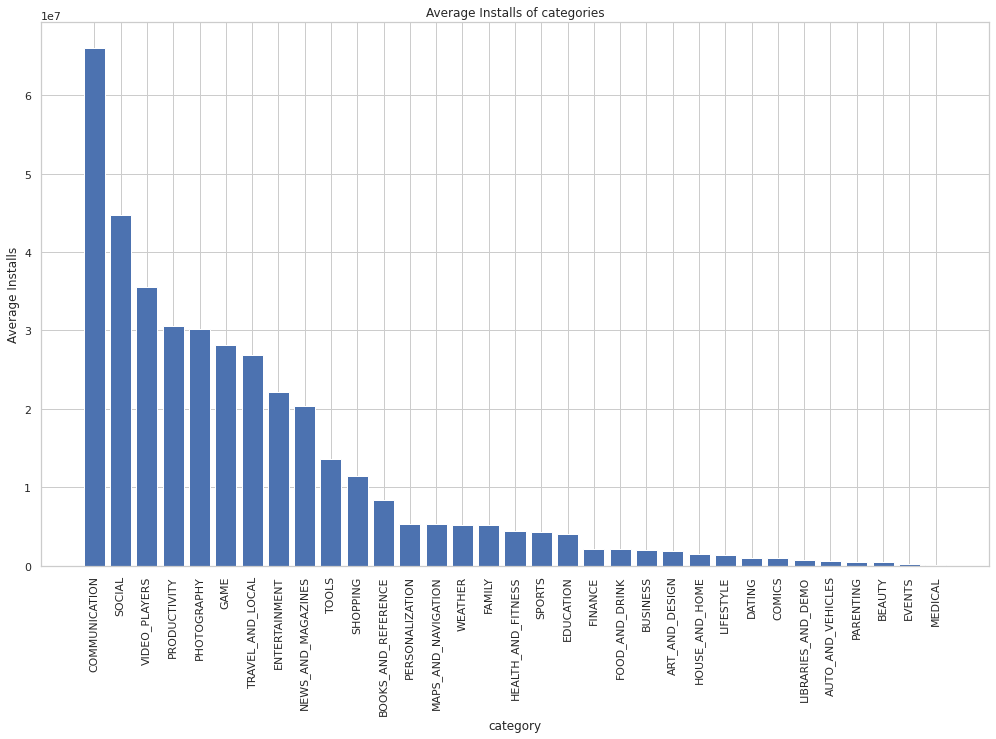

In [362]:
# Plotting above dataframe
plt.figure(figsize = (17,10))
plt.bar(cat_inst['Category'], cat_inst['Installs'])
plt.xticks(rotation='vertical')
plt.xlabel('category')
plt.ylabel('Average Installs')
plt.title('Average Installs of categories')

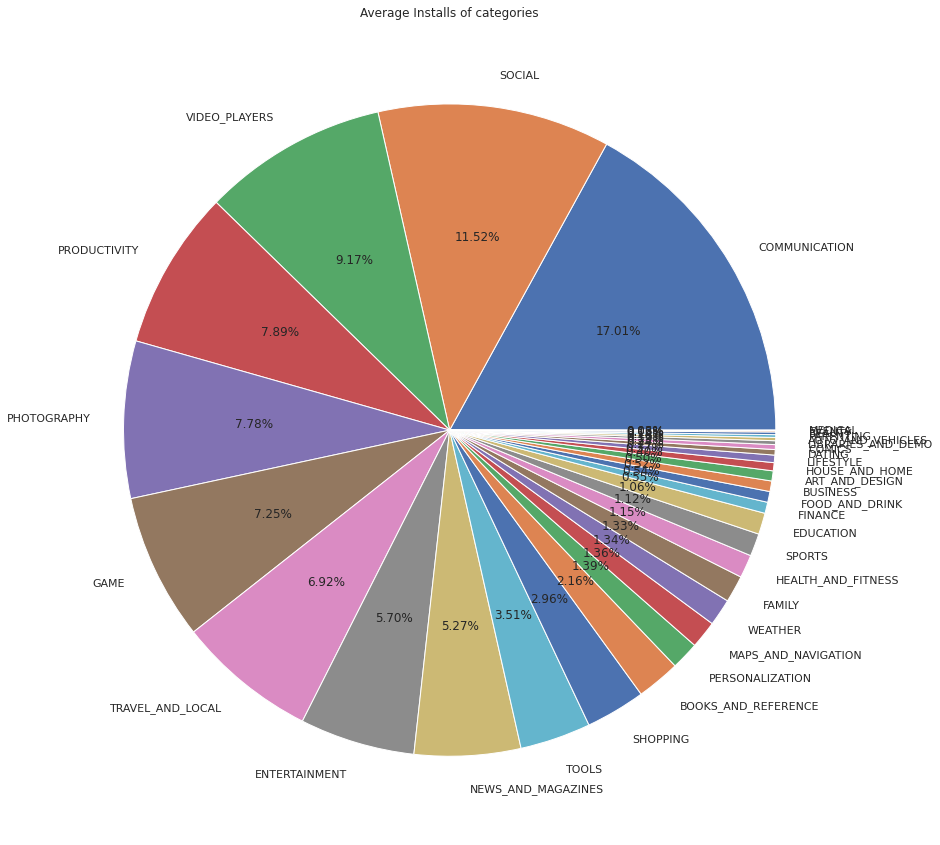

In [363]:
# Plotting pie chart for the above dataframe
plt.figure(figsize = (15,15))
plt.pie(cat_inst['Installs'], labels = cat_inst['Category'],  autopct='%1.2f%%')
plt.title('Average Installs of categories')
plt.show()

From the above visualizations, we can observe that COMMUNICATION category has highest installs followed by SOCIAL and the least is MEDICAL

In [364]:
# Categories with reviews
cat_rev = new_data_app.groupby('Category')['Reviews'].sum().reset_index()
cat_rev = cat_rev.sort_values(by = 'Reviews', ascending = False)
cat_rev

,Category,Reviews
14,GAME,1415536650
6,COMMUNICATION,601273552
27,SOCIAL,533576829
11,FAMILY,396771746
29,TOOLS,273181033
24,PHOTOGRAPHY,204297410
31,VIDEO_PLAYERS,110380188
25,PRODUCTIVITY,102554498
26,SHOPPING,94931162
23,PERSONALIZATION,75192744


In [365]:
# Printing top 5 Categories
print(f'The top 5 Categories with high reviews are {cat_rev.iloc[0:5,0].values}')

The top 5 Categories with high reviews are ['GAME' 'COMMUNICATION' 'SOCIAL' 'FAMILY' 'TOOLS']


Text(0.5, 1.0, 'Average reviews of categories')

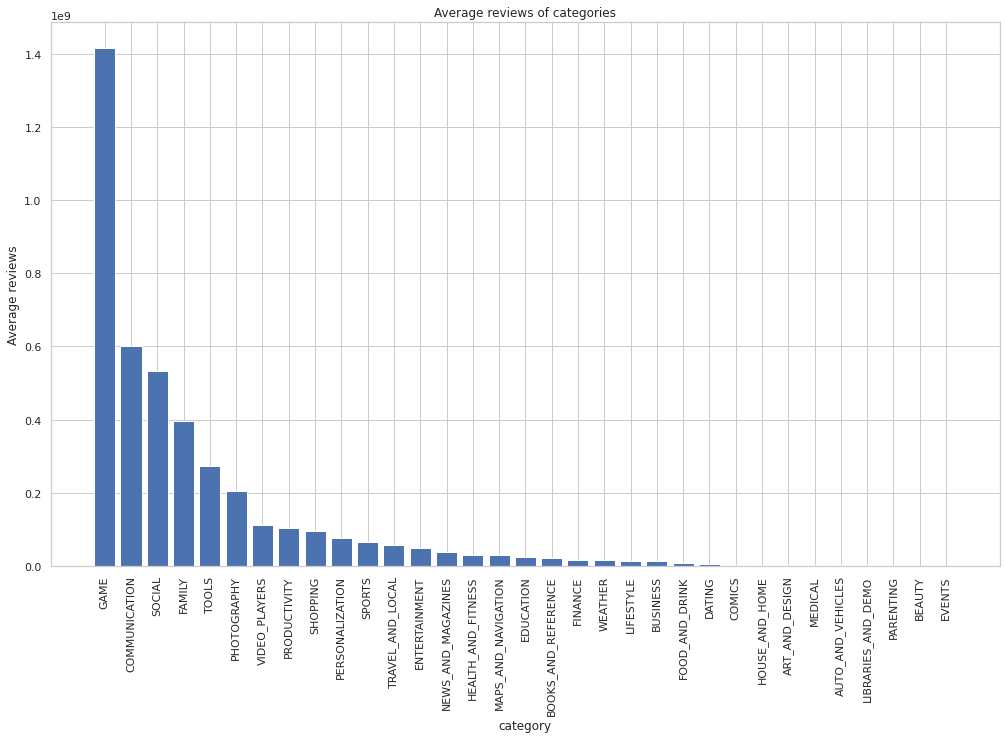

In [366]:
# Plotting above dataframe
plt.figure(figsize = (17,10))
plt.bar(cat_rev['Category'], cat_rev['Reviews'])
plt.xticks(rotation='vertical')
plt.xlabel('category')
plt.ylabel('Average reviews')
plt.title('Average reviews of categories')

From the above visualizations, we can see GAME followed by COMMUNICATION category has high reviews and least is EVENTS

In [367]:
# Type of Apps (Free/Paid)
types = new_data_app['Type'].value_counts().reset_index()
types = types.rename(columns = {'index':'type', 'Type':'count'})
types


,type,count
0,Free,9584
1,Paid,762


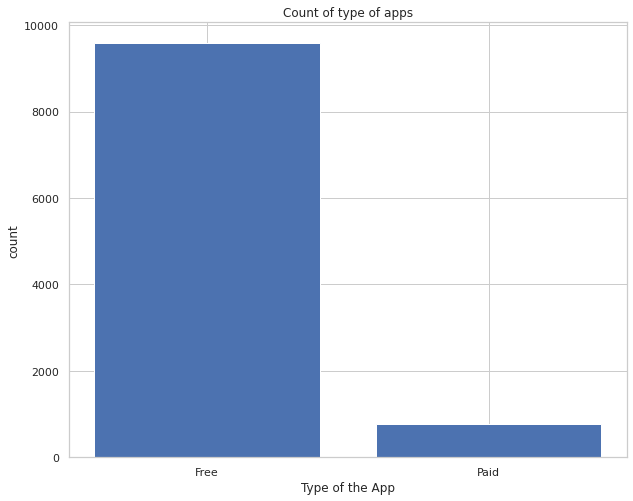

In [368]:
# Plotting bar chart for above dataframe
plt.figure(figsize =  (10,8))
plt.bar(types['type'], types['count'])
plt.xlabel('Type of the App')
plt.ylabel('count')
plt.title('Count of type of apps')
plt.show()

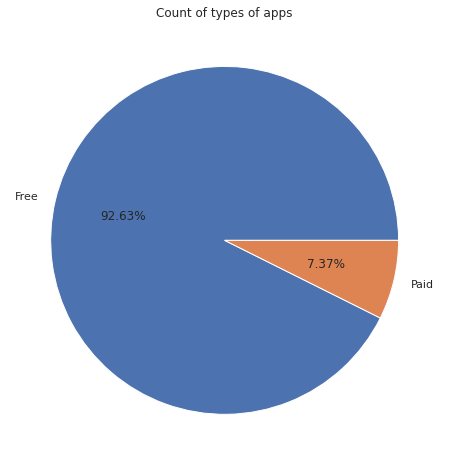

In [369]:
# Plotting pie chart for the above dataframe
plt.figure(figsize = (8,8))
plt.pie(types['count'], labels = types['type'],  autopct='%1.2f%%')
plt.title('Count of types of apps')
plt.show()

From the above visualizations, we can say that most of the apps are Free (92.63%)

In [370]:
# Relationship between installs and the type of the apps
type_inst = new_data_app.groupby('Type')['Installs'].mean().reset_index()
type_inst = type_inst.sort_values(by = 'Installs', ascending = False)
type_inst

,Type,Installs
0,Free,15292274.89003
1,Paid,90780.67060


Text(0.5, 1.0, 'Average Installs of Type of Apps')

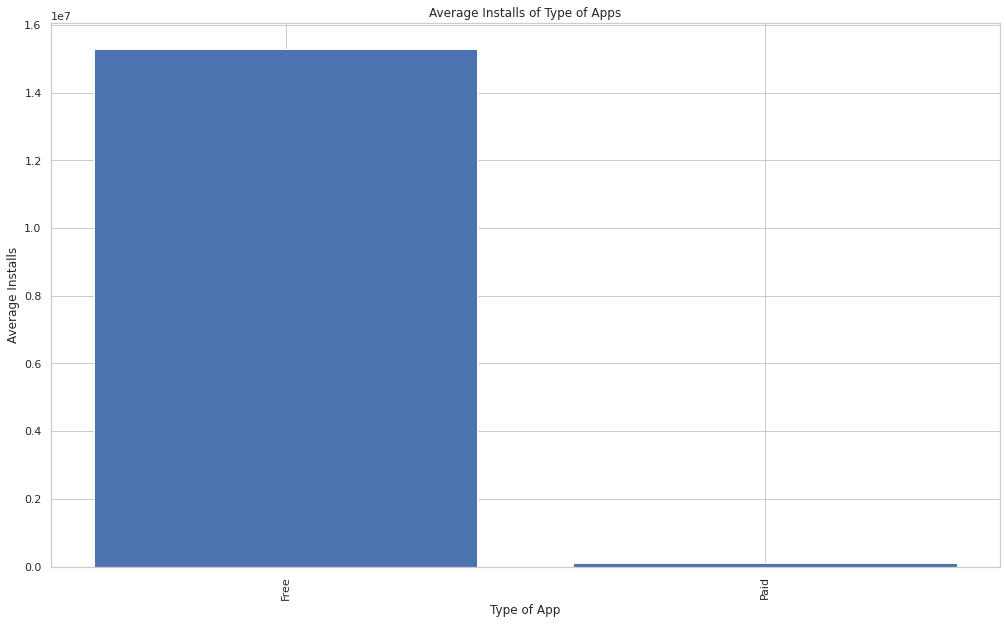

In [371]:

# Plotting above dataframe
plt.figure(figsize = (17,10))
plt.bar(type_inst['Type'], type_inst['Installs'])
plt.xticks(rotation='vertical')
plt.xlabel('Type of App')
plt.ylabel('Average Installs')
plt.title('Average Installs of Type of Apps')

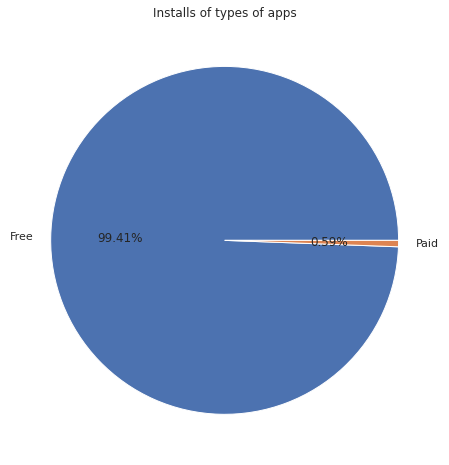

In [372]:
# Plotting pie chart for the above dataframe
plt.figure(figsize = (8,8))
plt.pie(type_inst['Installs'], labels = type_inst['Type'],  autopct='%1.2f%%')
plt.title('Installs of types of apps')
plt.show()

From the above visualizations, we can say that Free Apps has high installs than paid apps

In [373]:
# Content Rating analysis
cr = new_data_app['Content Rating'].value_counts().reset_index()
cr.rename(columns = {'index':'Content Rating', 'Content Rating': 'count'}, inplace = True)
cr

,Content Rating,count
0,Everyone,8372
1,Teen,1146
2,Mature 17+,447
3,Everyone 10+,376
4,Adults only 18+,3
5,Unrated,2


Text(0.5, 1.0, 'Count of Content Ratings')

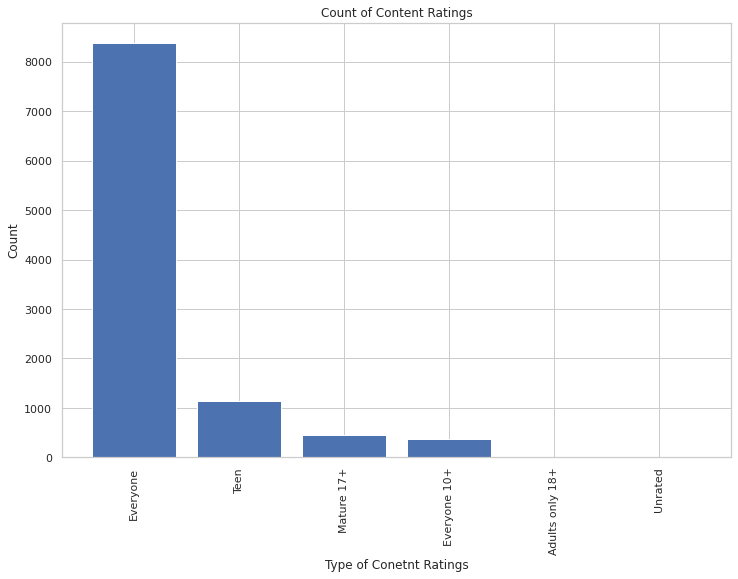

In [374]:
# Plotting above dataframe
plt.figure(figsize = (12,8))
plt.bar(cr['Content Rating'], cr['count'])
plt.xticks(rotation='vertical')
plt.xlabel('Type of Conetnt Ratings')
plt.ylabel('Count')
plt.title('Count of Content Ratings')

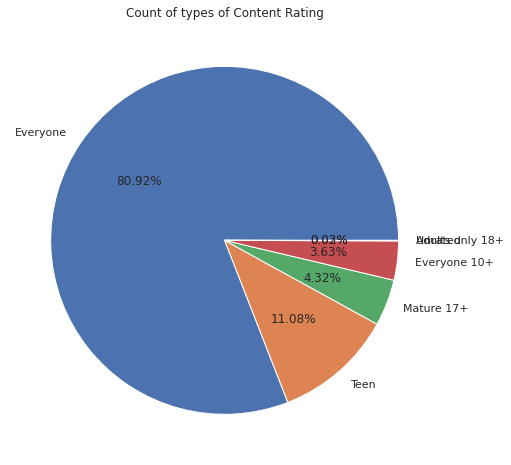

In [375]:
# Plotting pie chart for the above dataframe
plt.figure(figsize = (8,8))
plt.pie(cr['count'], labels = cr['Content Rating'],  autopct='%1.2f%%')
plt.title('Count of types of Content Rating')
plt.show()

From the above visualizations, Everyone content rating apps are more than others. That means, most of the apps are for everyone.

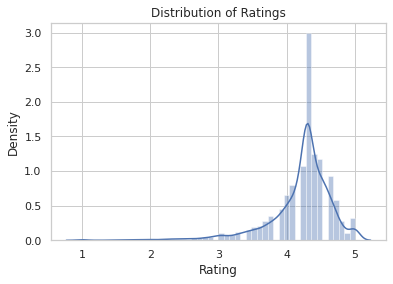

In [376]:
# DIstribution of ratings
sns.distplot(new_data_app['Rating'])
plt.title('Distribution of Ratings')
plt.show()

The above distribution plot is negatively skewed, and most number of ratings are in range of 4 to 5.

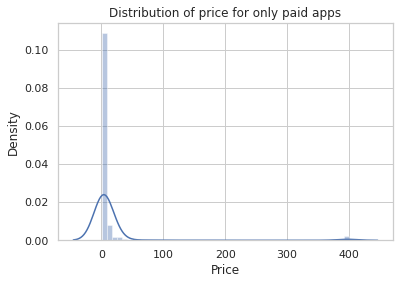

In [377]:
# Lets find the distributions of price for paid apps
paid_data = new_data_app[new_data_app['Type'] == 'Paid']

# Function that converts string to float
def to_float(x):
  return float(x[1:])

#Applying the above function to the Price column
paid_data['Price'] = paid_data['Price'].apply(to_float)

#plotting distribution plot of price
sns.distplot(paid_data['Price'])
plt.title('Distribution of price for only paid apps')
plt.show()

From the above distribution plot, we can say that most prices are in the range of 0 to 50 and a very few are in the range of 50 to 450

In [378]:
#Creating new column 'Revenue' for paid apps
paid_data['Revenue'] = paid_data['Installs'] * paid_data['Price']
paid_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,updated_year,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.70000,11442,6.8M,100000,Paid,4.99000,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,2018,499000.00000
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.80000,10295,39M,100000,Paid,4.99000,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,2017,499000.00000
427,Puffin Browser Pro,COMMUNICATION,4.00000,18247,Varies with device,100000,Paid,3.99000,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,2018,399000.00000
476,"Moco+ - Chat, Meet People",DATING,4.20000,1545,Varies with device,10000,Paid,3.99000,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,2018,39900.00000
477,Calculator,DATING,2.60000,57,6.2M,1000,Paid,6.99000,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,2017,6990.00000


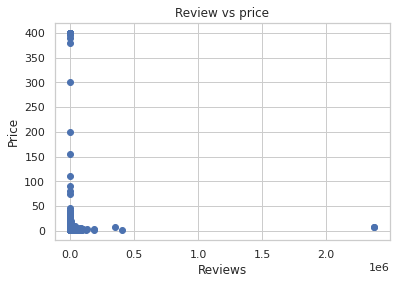

In [379]:
# How Reviews and prices are related for paid apps
plt.scatter(paid_data['Reviews'], paid_data['Price'])
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.title('Review vs price')
plt.show()

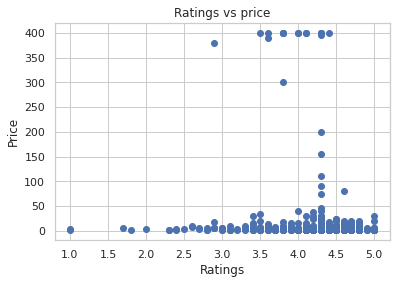

In [380]:
# How Ratings and Prices are related for paid apps
plt.scatter(paid_data['Rating'], paid_data['Price'])
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.title('Ratings vs price')
plt.show()

From the above scatter plots, we can observe that 


*   Most of the apps has prices of less than 50 USD
*   And very few apps has high prices.



In [381]:
# Describing the Revenue column
paid_data['Revenue'].describe()

count        762.00000
mean      482179.59041
std      3982076.83764
min            0.00000
25%          299.00000
50%         4990.00000
75%        69900.00000
max     69900000.00000
Name: Revenue, dtype: float64

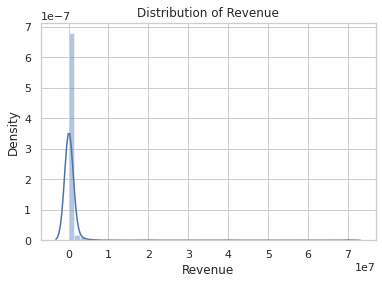

In [382]:
# Distribution of revenue
sns.distplot(paid_data['Revenue'])
plt.title('Distribution of Revenue')
plt.show()

Text(0.5, 1.0, 'Review vs Revenue')

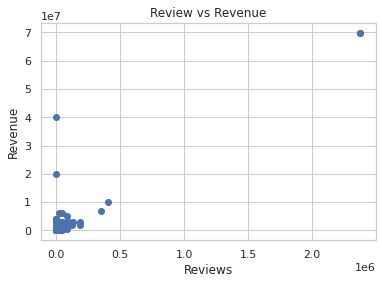

In [383]:
# Relation between Reviews and Revenue
plt.scatter(paid_data['Reviews'], paid_data['Revenue'])
plt.xlabel('Reviews')
plt.ylabel('Revenue')
plt.title('Review vs Revenue')

From the above plots we can observe that very few paid apps have highest revenue. Most of the paid apps have some decent amount of revenue.

In [384]:
# Creating Dataframe of category and their average revenue
cat_revenue = paid_data.groupby('Category')['Revenue'].mean().reset_index().sort_values(by = 'Revenue', ascending = False)
cat_revenue

,Category,Revenue
15,LIFESTYLE,3030733.65263
10,FINANCE,1513334.05765
9,FAMILY,998552.87828
6,EDUCATION,600995.00000
29,WEATHER,522672.50000
12,GAME,493826.95000
21,PHOTOGRAPHY,447138.38500
7,ENTERTAINMENT,399000.00000
16,MAPS_AND_NAVIGATION,248157.80000
25,SPORTS,196092.16458


Text(0.5, 1.0, 'Average Revenue of categories')

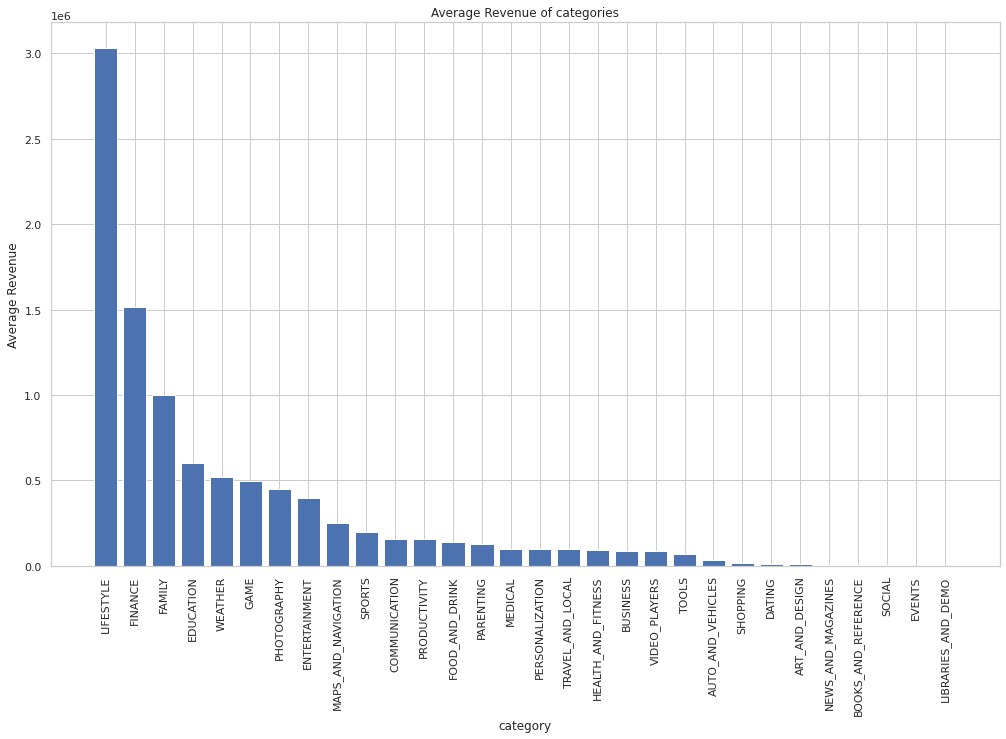

In [385]:
# Plotting above dataframe
plt.figure(figsize = (17,10))
plt.bar(cat_revenue['Category'], cat_revenue['Revenue'])
plt.xticks(rotation='vertical')
plt.xlabel('category')
plt.ylabel('Average Revenue')
plt.title('Average Revenue of categories')

From the above visualizations, LIFESTYLE caregory has highest average revenue.

In [386]:
# Creating Dataframe of category and their average revenue
cat_price = paid_data.groupby('Category')['Price'].mean().reset_index().sort_values(by = 'Price', ascending = False)
cat_price

,Category,Price
10,FINANCE,170.63706
15,LIFESTYLE,124.25632
8,EVENTS,109.99000
3,BUSINESS,14.60750
9,FAMILY,13.00984
17,MEDICAL,12.15107
22,PRODUCTIVITY,8.96179
21,PHOTOGRAPHY,6.11150
16,MAPS_AND_NAVIGATION,5.39000
24,SOCIAL,5.32333


Text(0.5, 1.0, 'Average Price of categories')

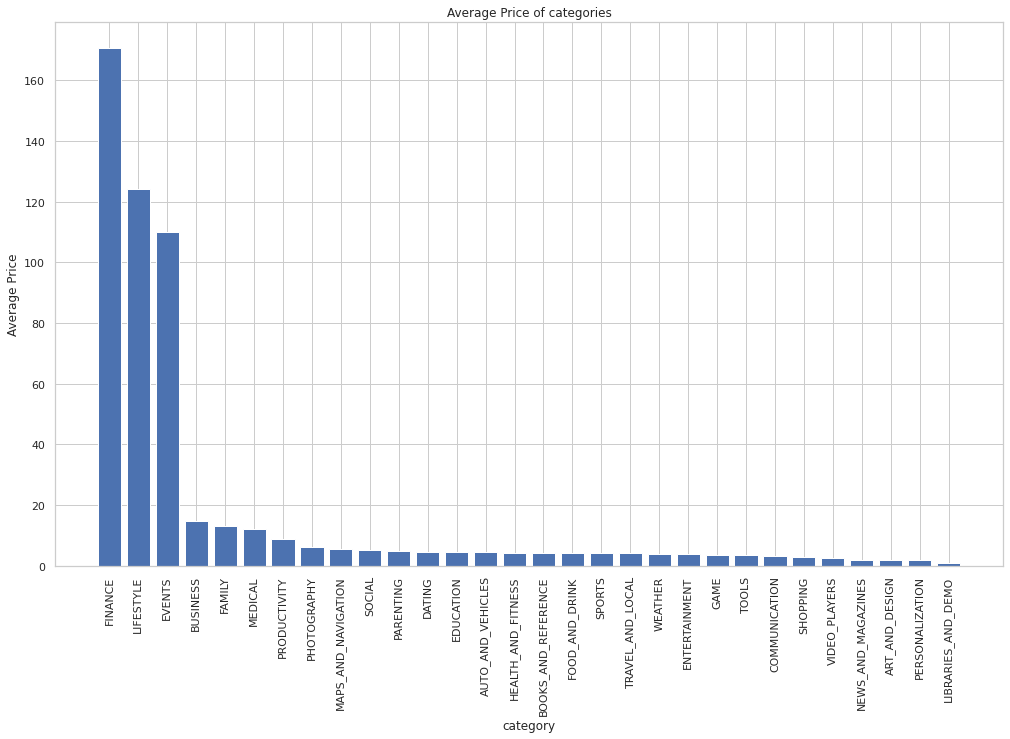

In [387]:
# Plotting above dataframe
plt.figure(figsize = (17,10))
plt.bar(cat_price['Category'], cat_price['Price'])
plt.xticks(rotation='vertical')
plt.xlabel('category')
plt.ylabel('Average Price')
plt.title('Average Price of categories')

From the above visualizations, FINANCE, LIFESTYLE category has high average prices and the least is SOCIAL.

In [388]:
# Finding the apps with high revenue
high_revenue = paid_data.groupby('App')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False).reset_index()
high_revenue

,index,App,Revenue
0,456,Minecraft,139800000.00000
1,382,I am rich,39999000.00000
2,371,I Am Rich Premium,19999500.00000
3,365,Hitman Sniper,9900000.00000
4,350,Grand Theft Auto: San Andreas,6990000.00000
...,...,...,...
748,61,Ak Parti Yardım Toplama,0.00000
749,60,Ain Arabic Kids Alif Ba ta,0.00000
750,387,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0.00000
751,272,EP Cook Book,0.00000


Text(0.5, 1.0, 'Top 10 high revenue generated apps')

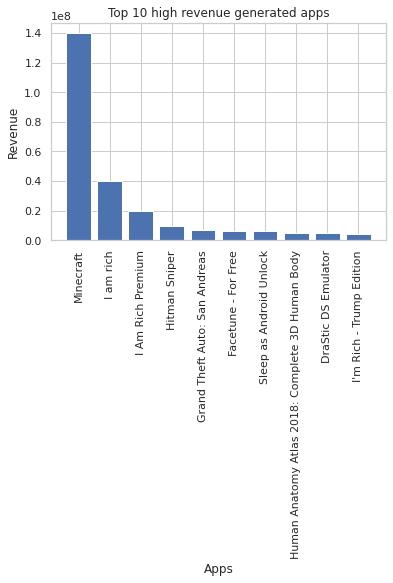

In [389]:
# Visualization of top 10 high revenue apps
x = high_revenue.iloc[0:10, 1].values
y = high_revenue.iloc[0:10, 2].values
plt.bar(x, y)
plt.xlabel('Apps')
plt.xticks(rotation = 'vertical')
plt.ylabel('Revenue')
plt.title('Top 10 high revenue generated apps')

In [390]:
# Printing top 5 Revenue apps
print(f'The top 5 high revenue apps are {high_revenue.iloc[0:5, 1].values}')

The top 5 high revenue apps are ['Minecraft' 'I am rich' 'I Am Rich Premium' 'Hitman Sniper'
 'Grand Theft Auto: San Andreas']


In [391]:
# Inspecting On Content Rating column
new_data_app['Content Rating'].value_counts()

Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [392]:
# Creating Dataframe of genres and their count
genre = new_data_app['Genres'].value_counts().reset_index()
genre.rename(columns = {'index':'genre', 'Genres':'Count'}, inplace = True)
genre

,genre,Count
0,Tools,840
1,Entertainment,587
2,Education,526
3,Business,427
4,Medical,408
...,...,...
114,Parenting;Brain Games,1
115,Travel & Local;Action & Adventure,1
116,Lifestyle;Pretend Play,1
117,Tools;Education,1


From the above dataframe, we can say that there are total 115 genres exists in the data

In [393]:
# The top 10 genres with most number of apps 
top_10_genre = genre.head(10)
top_10_genre

,genre,Count
0,Tools,840
1,Entertainment,587
2,Education,526
3,Business,427
4,Medical,408
5,Productivity,407
6,Personalization,386
7,Lifestyle,372
8,Communication,366
9,Sports,364


Text(0.5, 1.0, 'Top 10 genres')

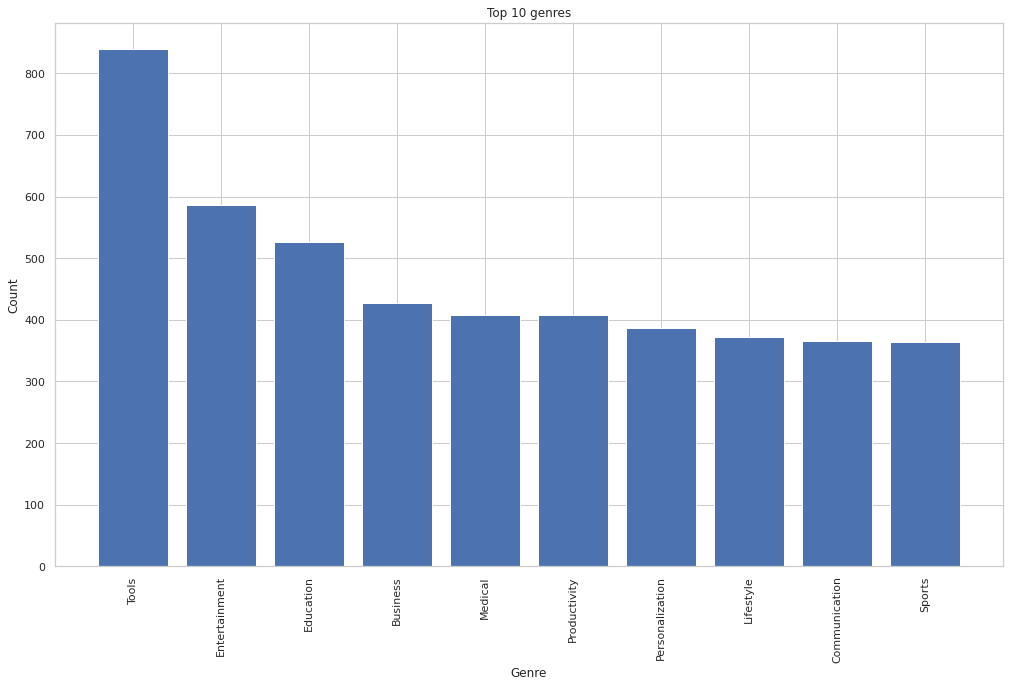

In [394]:
# Plotting above dataframe
plt.figure(figsize = (17,10))
plt.bar(top_10_genre['genre'], top_10_genre['Count'])
plt.xticks(rotation='vertical')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 genres')

The above bar graph displays top 10 genres with most number of apps. And they are Tools, Entertainment, Education, Business, Medical, Productivity, Personalization, Lifestyle, Communication, Sports.

**Lets find out which genre has highest ratings and highest installs**

In [395]:
# Creating Dataframe of genres and their average ratings
genre_rat = new_data_app.groupby('Genres')['Rating'].mean().reset_index()
genre_rat = genre_rat.sort_values(by = 'Rating', ascending = False)
genre_rat

,Genres,Rating
18,Board;Pretend Play,4.80000
35,Comics;Creativity,4.80000
64,Health & Fitness;Education,4.70000
4,Adventure;Brain Games,4.60000
87,Puzzle;Education,4.60000
...,...,...
49,Educational;Creativity,3.96000
46,Educational,3.92973
12,Art & Design;Pretend Play,3.90000
63,Health & Fitness;Action & Adventure,3.90000


Comics;Creativity and Board; Pretend play	genres have highest rating and the Parenting;Brain Games genre has least ratings.

In [396]:
# Displaying top 10 genres with high ratings
top_10_rat_genre = genre_rat.head(10)
print(f'The top 10 genres with high ratings are {top_10_rat_genre.iloc[:, 0].values}')

The top 10 genres with high ratings are ['Board;Pretend Play' 'Comics;Creativity' 'Health & Fitness;Education'
 'Adventure;Brain Games' 'Puzzle;Education' 'Strategy;Action & Adventure'
 'Entertainment;Creativity' 'Music;Music & Video' 'Racing;Pretend Play'
 'Arcade;Pretend Play']


Text(0.5, 1.0, 'Top 10 genres with high ratings')

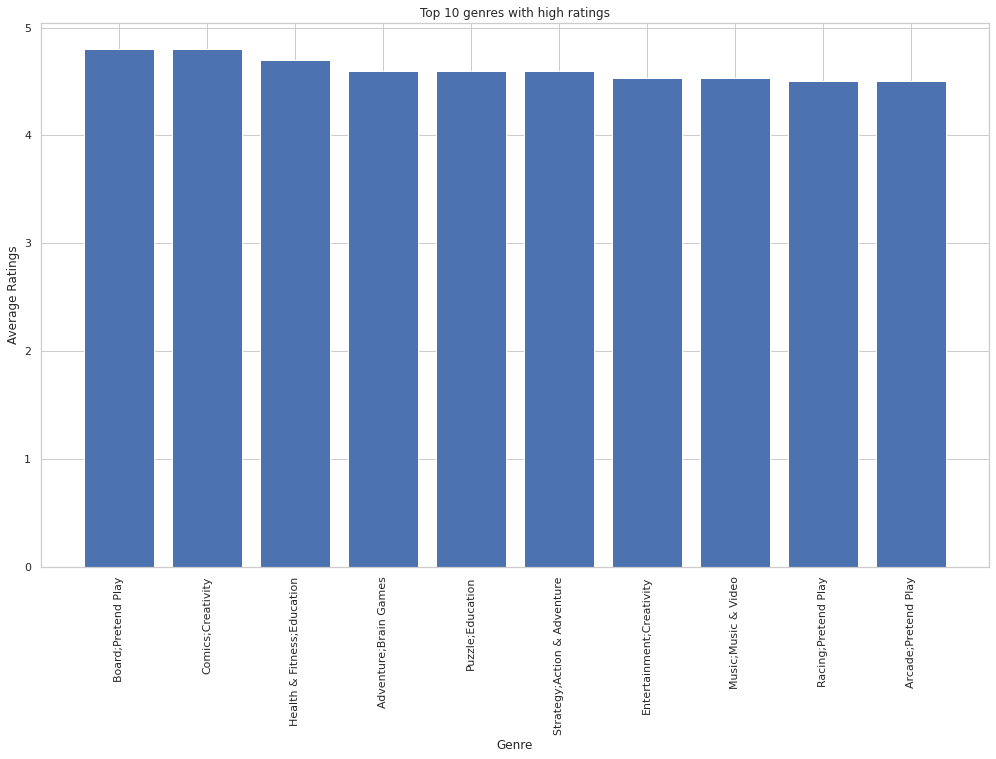

In [397]:
# Plotting above dataframe
plt.figure(figsize = (17,10))
plt.bar(top_10_rat_genre['Genres'], top_10_rat_genre['Rating'])
plt.xticks(rotation='vertical')
plt.xlabel('Genre')
plt.ylabel('Average Ratings')
plt.title('Top 10 genres with high ratings')

From the above visualization, we can see the genres with highest ratings.

In [398]:
# Creating Dataframe of genres and their average Installs
genre_inst = new_data_app.groupby('Genres')['Installs'].mean().reset_index()
genre_inst = genre_inst.sort_values(by = 'Installs', ascending = False)
genre_inst

,Genres,Installs
3,Adventure;Action & Adventure,69703846.15385
36,Communication,65989825.82240
27,Casual,45355134.76440
101,Social,44692385.36429
6,Arcade,44573986.94954
...,...,...
21,Books & Reference;Education,5500.00000
18,Board;Pretend Play,100.00000
20,Books & Reference;Creativity,100.00000
94,Role Playing;Education,100.00000


Adventure;Action & Adventure and Communication genres have high installs and Trivia;Education genre has very few installs

In [399]:
# Displaying top 10 genres with high reviews
top_10_inst_genre = genre_inst.head(10)
print(f'The top 10 genres with high installs are {top_10_inst_genre.iloc[:, 0].values}')

The top 10 genres with high installs are ['Adventure;Action & Adventure' 'Communication' 'Casual' 'Social' 'Arcade'
 'Video Players & Editors' 'Puzzle;Action & Adventure' 'Productivity'
 'Photography' 'Travel & Local']


Text(0.5, 1.0, 'Top 10 genres with high Installs')

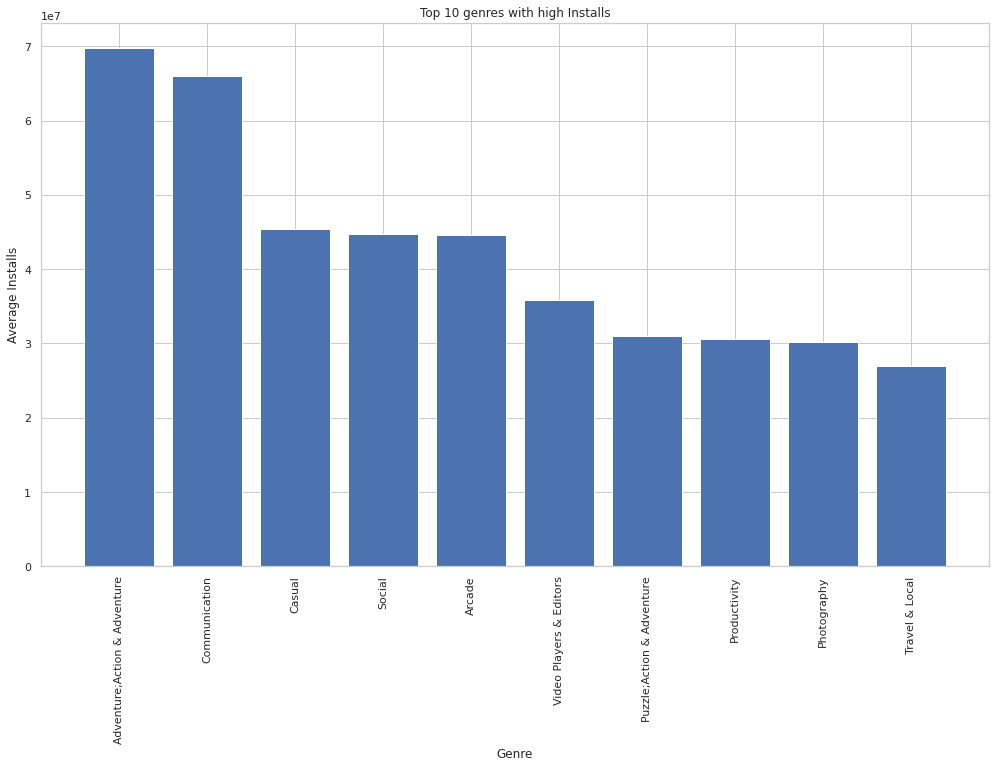

In [400]:
# Plotting above dataframe
plt.figure(figsize = (17,10))
plt.bar(top_10_inst_genre['Genres'], top_10_inst_genre['Installs'])
plt.xticks(rotation='vertical')
plt.xlabel('Genre')
plt.ylabel('Average Installs')
plt.title('Top 10 genres with high Installs')

From the above visualization, we can see the genres with highest installs.

# **Review Analysis**

In [401]:
# Inspecting reviews dataset
review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00000,0.53333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25000,0.28846
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40000,0.87500
4,10 Best Foods for You,Best idea us,Positive,1.00000,0.30000


**Understanding the features of Review dataset:**


*   **App** : Name of the data

*   **Translated Review** : Text of the review

*   **Sentiment** : The review is good or not
*   **Sentiment Polarity** : The polarity of sentiment measure how negative or    positive the context is.


*   **Sentiment Subjectivity** : Sentiment subjectivity




In [402]:
# Shape of reviews dataset
print(f'The User reviews dataset has {review.shape[0]} rows and {review.shape[1]} columns')

The User reviews dataset has 64295 rows and 5 columns


In [403]:
# Checking the info of review dataset
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [404]:
# Checking for null values 
review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

We have 4 features with null values in review dataset.

In [405]:
# Removing null values
review.dropna(inplace = True)

In [406]:
# Checking duplicated values after removing null values
review.duplicated().value_counts()

False    29692
True      7735
dtype: int64

Here, we have 7,735 duplicated rows

In [407]:
# Removing duplicated rows
review.drop_duplicates(inplace = True)

In [408]:
#Inspecting review dataset after removing null values and duplicated values
review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00000,0.53333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25000,0.28846
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40000,0.87500
4,10 Best Foods for You,Best idea us,Positive,1.00000,0.30000
5,10 Best Foods for You,Best way,Positive,1.00000,0.30000


In [409]:
# Unique Apps and reviews count
review['App'].value_counts().reset_index().rename(columns = {'index':'App', 'App':'count'})

,App,count
0,Facebook,130
1,Episode - Choose Your Story,124
2,Angry Birds Classic,107
3,Family Locator - GPS Tracker,105
4,Google Photos,101
...,...,...
860,Caller ID +,1
861,Free Live Talk-Video Call,1
862,CBS News,1
863,Calendar+ Schedule Planner App,1


From the above dataframe, we can see Facebook has higher reviews.

In [410]:
# Sentiment types and their counts
review['Sentiment'].value_counts().reset_index().rename(columns = {'index':'Sentiment', 'Sentiment':'count'})

,Sentiment,count
0,Positive,19015
1,Negative,6321
2,Neutral,4356


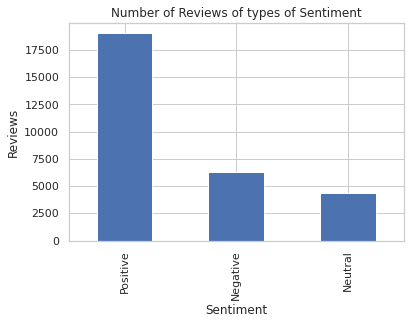

In [411]:
# Plotting bar chart
review['Sentiment'].value_counts().plot.bar()
plt.xlabel('Sentiment')
plt.ylabel('Reviews')
plt.title('Number of Reviews of types of Sentiment')
plt.show()

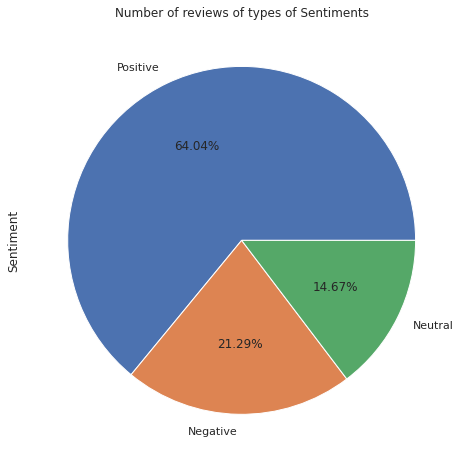

In [412]:
# Plotting pie chart of sentiments
plt.figure(figsize = (8,8))
review['Sentiment'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Number of reviews of types of Sentiments')
plt.show()

From the above visualizations, most reviews are positive i.e., 64.04%, 21.29% reviews are Negative, and 14.67% reviews are Neutral. 

In [413]:
# Assigning score to apps
def score(x):
  if x == 'Positive':
    return 1
  elif x == 'Negative':
    return -1
  else:
    return 0

review['score'] = review['Sentiment'].apply(score)
review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00000,0.53333,1
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25000,0.28846,1
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40000,0.87500,1
4,10 Best Foods for You,Best idea us,Positive,1.00000,0.30000,1
5,10 Best Foods for You,Best way,Positive,1.00000,0.30000,1


In [414]:
# Creating a adataframe with apps and their scores
score_df = review.groupby('App')['score'].sum().reset_index().sort_values(by= 'score', ascending = False).reset_index()

# displaying top 10 apps with highest scores
score_df.head(10)

,index,App,score
0,378,ColorNote Notepad Notes,85
1,329,Calorie Counter - MyNetDiary,80
2,583,Family Locator - GPS Tracker,78
3,327,Calorie Counter - Macros,77
4,0,10 Best Foods for You,74
5,229,Bible,73
6,24,8fit Workouts & Meal Planner,71
7,682,Fuelio: Gas log & costs,69
8,814,Health and Nutrition Guide,64
9,801,Hairstyles step by step,63


The above dataframe consists of top 10 apps with high scores

In [415]:
# Displaying top 10 apps with more positive reviews and their respective categories
top10apps = list(score_df.iloc[0:10, 1].values)
cat = []
for i in top10apps:
  cat.append(new_data_app[new_data_app['App'] == i]['Category'].values)

data = {
    'apps':top10apps,
    'category':cat
}
pd.DataFrame(data)

,apps,category
0,ColorNote Notepad Notes,[PRODUCTIVITY]
1,Calorie Counter - MyNetDiary,[HEALTH_AND_FITNESS]
2,Family Locator - GPS Tracker,[LIFESTYLE]
3,Calorie Counter - Macros,[HEALTH_AND_FITNESS]
4,10 Best Foods for You,[HEALTH_AND_FITNESS]
5,Bible,[BOOKS_AND_REFERENCE]
6,8fit Workouts & Meal Planner,[HEALTH_AND_FITNESS]
7,Fuelio: Gas log & costs,[AUTO_AND_VEHICLES]
8,Health and Nutrition Guide,[HEALTH_AND_FITNESS]
9,Hairstyles step by step,[BEAUTY]


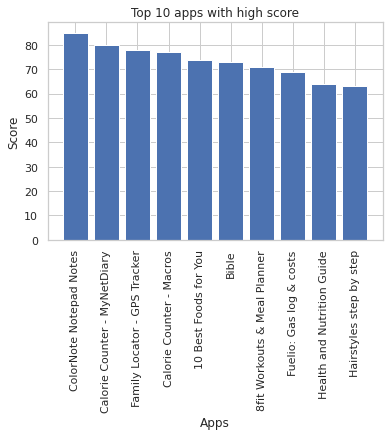

In [416]:
# Visualization of top 10 apps with high score
x_s = score_df.iloc[0:10, 1].values
y_s = score_df.iloc[0:10, 2].values
plt.bar(x_s, y_s)
plt.xlabel('Apps')
plt.xticks(rotation = 'vertical')
plt.ylabel('Score')
plt.title('Top 10 apps with high score')
plt.show()

From the above dataframe and visualization, we can observe the apps with more positive reviews

In [417]:
# Printing top 10 most popular apps
print(f'The top 10 most popular apps are {score_df.iloc[0:10, 1].values}')

The top 10 most popular apps are ['ColorNote Notepad Notes' 'Calorie Counter - MyNetDiary'
 'Family Locator - GPS Tracker' 'Calorie Counter - Macros'
 '10 Best Foods for You' 'Bible' '8fit Workouts & Meal Planner'
 'Fuelio: Gas log & costs' 'Health and Nutrition Guide'
 'Hairstyles step by step']


# **Final Conclusions:**



*   Most apps are from **FAMILY** category followed by **GAME** category and the least is **BEAUTY**

*   The top 5 Categories with high ratings are **EVENTS**, **EDUCATION**,**ART_AND_DESIGN**, **BOOKS_AND_REFERENCE**,
 **PERSONALIZATION**


*   **COMMUNICATION** category has highest installs and the least is **MEDICAL**



*   The top 5 Categories with high installs are **COMMUNICATION**, **SOCIAL**, **VIDEO_PLAYERS**, **PRODUCTIVITY**, 
 **PHOTOGRAPHY**

*   The top 5 Categories with high reviews are **GAME**, **COMMUNICATION**, **SOCIAL, FAMILY, TOOLS.**




*   Most of the apps(66.97%) are updated in **2018**.
*   **2018** updated apps have higher rating followed by **2010** and least is **2012**.

*   **2018** updated apps have higher Installs followed by **2017** and least is **2010.**
*   **2018** updated apps have higher Reviews followed by **2017** and least is **2010**.




*   Most of the apps are free (92.63%) and only 7.37% of apps are paid apps.

*   Free Apps has high installs (99.41%)than paid apps (0.59%)

*   Most number of ratings are in range of **4 to 5** and  most prices of paid apps are in the range of 0 to 50 USD and a very few are in the range of 50 to 450 USD

*  A very few paid apps have highest revenue. Most of the paid apps have some decent amount of revenue.
*    **LIFESTYLE** caregory has highest average revenue.


*   **FINANCE**, **LIFESTYLE** category has high average prices and the least is **SOCIAL**.


*   The top 5 revenue apps are **Minecraft**, **I am rich, I Am Rich Premium, Hitman Sniper, Grand Theft Auto: San Andreas**


*   There are total **115** genres exists in the data. The top 10 genres with most number of apps. And they are **Tools**, **Entertainment, Education, Business, Medical, Productivity, Personalization, Lifestyle, Communication, Sports.**


*   **Comics;Creativity** and **Board; Pretend play** genres have highest rating and the **Parenting;Brain Games** genre has least ratings.


*  **Adventure;Action & Adventure** and **Communication** genres have high installs and **Board; Pretend Play** genre has very few installs



*   **Facebook** app has higher reviews.



*   Most of the reviews are positive i.e., 64.04%, 21.29% reviews are Negative, and 14.67% reviews are Neutral.


*   The most popular apps (more positive reviews) are **ColorNote Notepad Notes**, **Calorie Counter - MyNetDiary**, **Family Locator - GPS Tracker**, **Calorie Counter - Macros**, **10 Best Foods for You**, **Bible, 8fit Workouts & Meal Planner, Fuelio: Gas log & costs, Health and Nutrition Guide, Hairstyles step by step**

